In [1]:

# Experiment with Dataset2

import pandas as pd

from code.clustering import run_kmeans, elbow_method
from code.post_processing import post_process_with_rf, \
    split_stable_and_misclassified
from code.utils import load_data_dataset2, plot_clusters

In [2]:
data_path = "../data/Dataset2.csv"
data = load_data_dataset2(data_path, has_labels=False)


Running Elbow Method...


C:\Users\User\Desktop\facultate\master\an1\BDA\BDA_Project\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\User\Desktop\facultate\master\an1\BDA\BDA_Project\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec

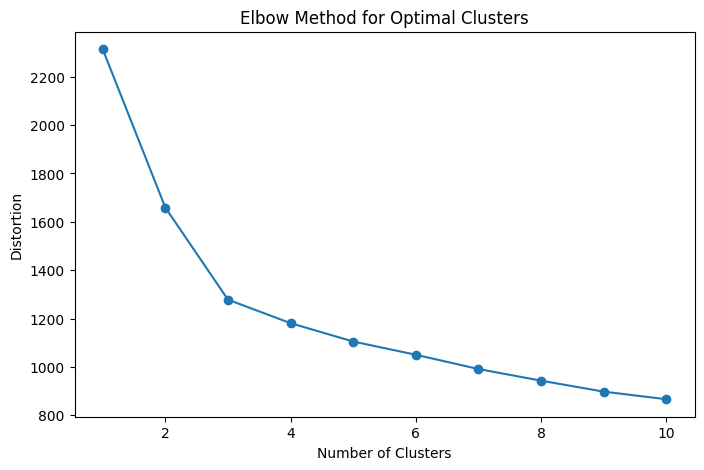

In [3]:
# Elbow method to find optimal clusters
print("Running Elbow Method...")
elbow_method(data, output_path="../results/dataset2/elbow_method.png")


In [4]:
# Run K-Means clustering
optimal_clusters = 3  # Replace with optimal number determined from elbow plot
print(f"Running K-Means with {optimal_clusters} clusters...")
kmeans_model, cluster_labels = run_kmeans(data, optimal_clusters)
centroids = kmeans_model.cluster_centers_

Running K-Means with 3 clusters...


Visualizing initial K-Means clustering...


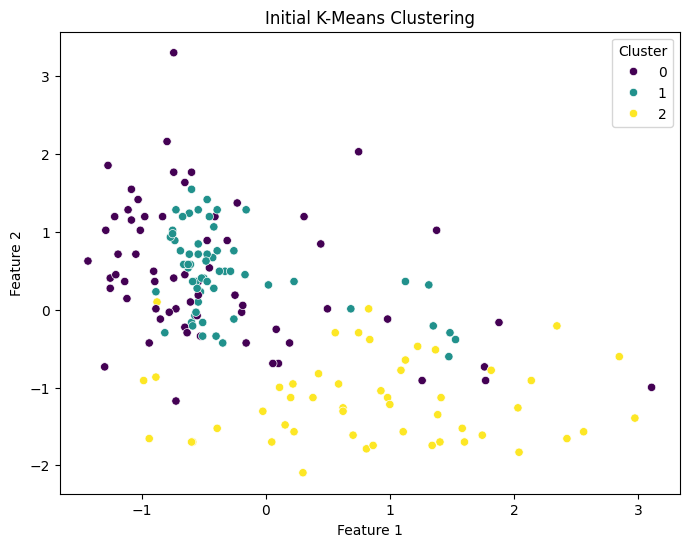

In [5]:
# Plot initial K-Means clustering results
print("Visualizing initial K-Means clustering...")
plot_clusters(data, cluster_labels, "Initial K-Means Clustering", "../results/dataset2/initial_kmeans.png")

In [6]:
# Convert cluster_labels to pd.Series for compatibility
cluster_labels = pd.Series(cluster_labels, index=data.index)

Splitting stable and misclassified points...
Visualizing stable and misclassified points...


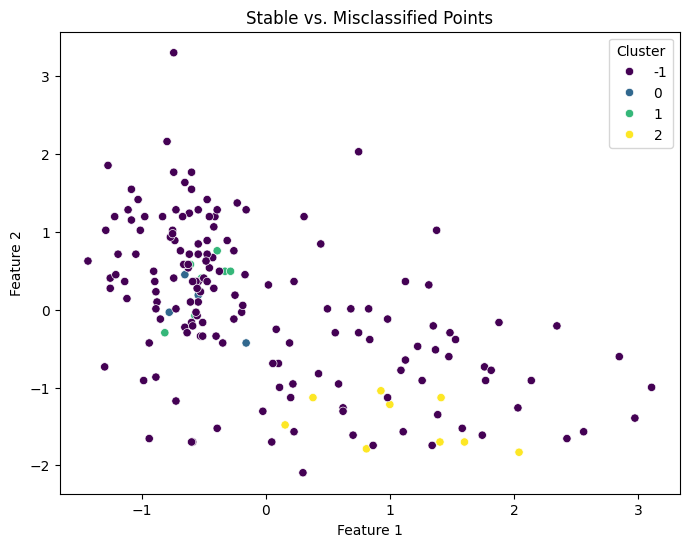

In [7]:
# Split stable and misclassified points
print("Splitting stable and misclassified points...")
stable_data, stable_labels, misclassified_data, misclassified_labels = split_stable_and_misclassified(
    data=pd.DataFrame(data),  # Ensure input is a DataFrame
    labels=pd.Series(cluster_labels, name="Cluster"),
    centroids=centroids,
    threshold=0.4
)

# Combine data and labels for visualization
combined_data = pd.concat([stable_data, misclassified_data])
combined_labels = pd.concat([stable_labels, misclassified_labels])

# Visualize stable and misclassified points
print("Visualizing stable and misclassified points...")
plot_clusters(
    combined_data,
    combined_labels,
    title="Stable vs. Misclassified Points",
    output_path="../results/dataset2/stable_vs_misclassified.png"
)


Running Random Forest for post-processing...
Visualizing post-processed clustering results...


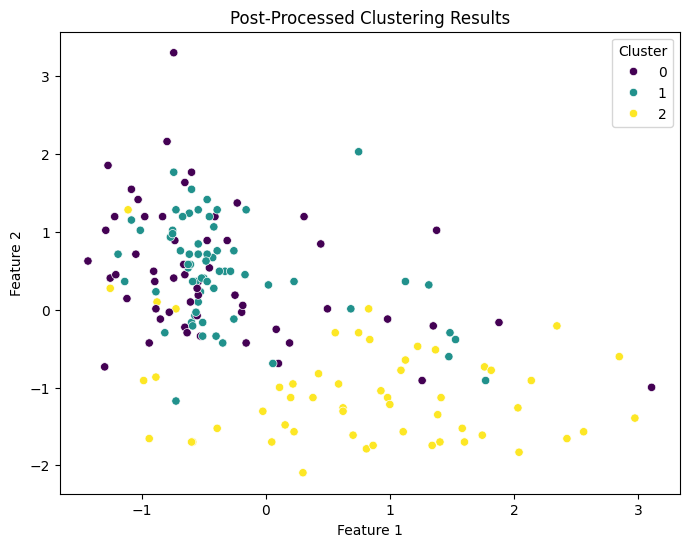

In [8]:
# Run post-processing and calculate metrics
if not misclassified_data.empty:
    print("Running Random Forest for post-processing...")
    updated_labels = post_process_with_rf(
        stable_data, stable_labels,
        misclassified_data,
    )

    # Update cluster_labels with the post-processed labels
    cluster_labels.update(updated_labels)

# Visualize post-processed clustering results
print("Visualizing post-processed clustering results...")
plot_clusters(data, cluster_labels, "Post-Processed Clustering Results", "../results/dataset2/post_processed.png")
